# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.0+cu121'

In [2]:
# Setup device-agnostic code
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [3]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature

start = 0
end = 100
step = 0.5

X = torch.arange(start, end, step).unsqueeze(dim=1) 
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 200
Number of y samples: 200
First 10 X & y samples:
X: tensor([[0.0000],
        [0.5000],
        [1.0000],
        [1.5000],
        [2.0000],
        [2.5000],
        [3.0000],
        [3.5000],
        [4.0000],
        [4.5000]])
y: tensor([[0.9000],
        [1.0500],
        [1.2000],
        [1.3500],
        [1.5000],
        [1.6500],
        [1.8000],
        [1.9500],
        [2.1000],
        [2.2500]])


In [4]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

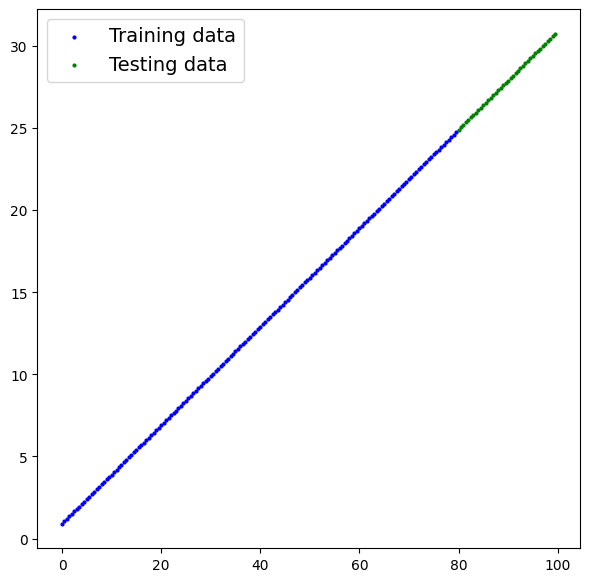

In [5]:
# Plot the training and testing data 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(7, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [6]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.linear_layer(x)

torch.manual_seed(42)
model = LinRegModel()
model, model.state_dict()

(LinRegModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [7]:
# Instantiate the model and put it to the target device
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [8]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

In [9]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    # Put model in train mode
    model.train() # set training mode

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Perform testing every 20 epochs
    if epoch % 20 == 0:
        with torch.inference_mode():
            # Put model in evaluation mode and setup inference context 
            model.eval()
            # 1. Forward pass
            test_pred = model(X_test)
          
            # 2. Calculate test loss
            test_loss = loss_fn(test_pred, y_test)
            # Print out what's happening
            print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 18.396 | Test loss: 38.054
Epoch: 20 | Train loss: 0.557 | Test loss: 2.414
Epoch: 40 | Train loss: 0.519 | Test loss: 2.498
Epoch: 60 | Train loss: 0.481 | Test loss: 2.583
Epoch: 80 | Train loss: 0.443 | Test loss: 2.668
Epoch: 100 | Train loss: 0.410 | Test loss: 2.742
Epoch: 120 | Train loss: 0.384 | Test loss: 2.799
Epoch: 140 | Train loss: 0.359 | Test loss: 2.855
Epoch: 160 | Train loss: 0.333 | Test loss: 2.912
Epoch: 180 | Train loss: 0.308 | Test loss: 2.969
Epoch: 200 | Train loss: 0.283 | Test loss: 3.025
Epoch: 220 | Train loss: 0.257 | Test loss: 3.082
Epoch: 240 | Train loss: 0.232 | Test loss: 3.139
Epoch: 260 | Train loss: 0.207 | Test loss: 3.193
Epoch: 280 | Train loss: 0.192 | Test loss: 3.228


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [10]:
# Make predictions with the model
model.eval()

with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[24.6186],
        [24.7673],
        [24.9160],
        [25.0647],
        [25.2134],
        [25.3621],
        [25.5108],
        [25.6595],
        [25.8082],
        [25.9569],
        [26.1056],
        [26.2543],
        [26.4030],
        [26.5517],
        [26.7003],
        [26.8490],
        [26.9977],
        [27.1464],
        [27.2951],
        [27.4438],
        [27.5925],
        [27.7412],
        [27.8899],
        [28.0386],
        [28.1873],
        [28.3360],
        [28.4847],
        [28.6334],
        [28.7821],
        [28.9308],
        [29.0795],
        [29.2282],
        [29.3768],
        [29.5255],
        [29.6742],
        [29.8229],
        [29.9716],
        [30.1203],
        [30.2690],
        [30.4177]], device='cuda:0')

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.2974]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8275], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


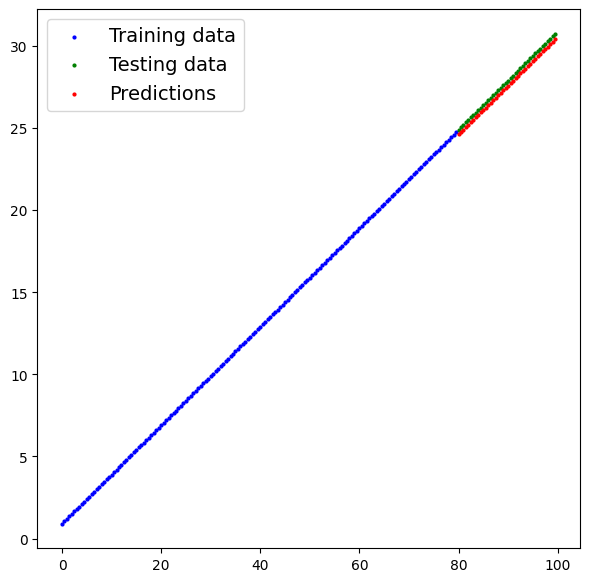

In [11]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu())
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [12]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_workflow_exercises.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_workflow_exercises.pth


In [13]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_1 = LinRegModel()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinRegModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


/tmp/ipykernel_14068/2360764096.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


In [14]:
# Make predictions with loaded model and compare them to the previous
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')